In [16]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt

# Load the data
data_path = 'Data/Triangle.csv'
df = pd.read_csv(data_path)

# Ensure 'IS_NOSE' column exists (create randomly if not present)
if 'IS_NOSE' not in df.columns:
    np.random.seed(42)
    df['IS_NOSE'] = np.random.choice([0, 1], size=len(df))

# Prepare data for logistic regression
X = sm.add_constant(df[['x', 'y']])  # Adding a constant for the intercept
y = df['IS_NOSE']

In [18]:
# ---------------- Question 1: Logistic Regression Model ----------------
# Train the logistic regression model
model = sm.Logit(y, X).fit()
print(model.summary())

# Get the model equation
coef = model.params
model_equation = f"Logit(IS_NOSE) = {coef['const']:.4f} + {coef['x']:.4f}*x + {coef['y']:.4f}*y"
print("Question 1 Results:")
print(f"Model Equation (Cartesian): {model_equation}")

Optimization terminated successfully.
         Current function value: 0.603225
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                IS_NOSE   No. Observations:                   40
Model:                          Logit   Df Residuals:                       37
Method:                           MLE   Df Model:                            2
Date:                Sat, 30 Nov 2024   Pseudo R-squ.:                  0.1297
Time:                        20:54:59   Log-Likelihood:                -24.129
converged:                       True   LL-Null:                       -27.726
Covariance Type:            nonrobust   LLR p-value:                   0.02741
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1287      1.477     -2.118      0.034      -6.024      -0.233
x              0.7910      0.

In [20]:
# ---------------- Question 1: Predictions and Evaluation ----------------
# Predict with a threshold of 0.5
predicted_probs = model.predict(X)
predictions = (predicted_probs >= 0.5).astype(int)

# Calculate confusion matrix and accuracy
conf_matrix = confusion_matrix(y, predictions)
accuracy = accuracy_score(y, predictions)
f1 = f1_score(y, predictions)

print("\nQuestion 1 Results:")
print(f"Confusion Matrix (Cartesian):\n{conf_matrix}")
print(f"Accuracy Rate (Cartesian): {accuracy:.2f}")
print(f"F1-Score (Cartesian): {f1:.2f}")


Question 1 Results:
Confusion Matrix (Cartesian):
[[13  7]
 [ 9 11]]
Accuracy Rate (Cartesian): 0.60
F1-Score (Cartesian): 0.58


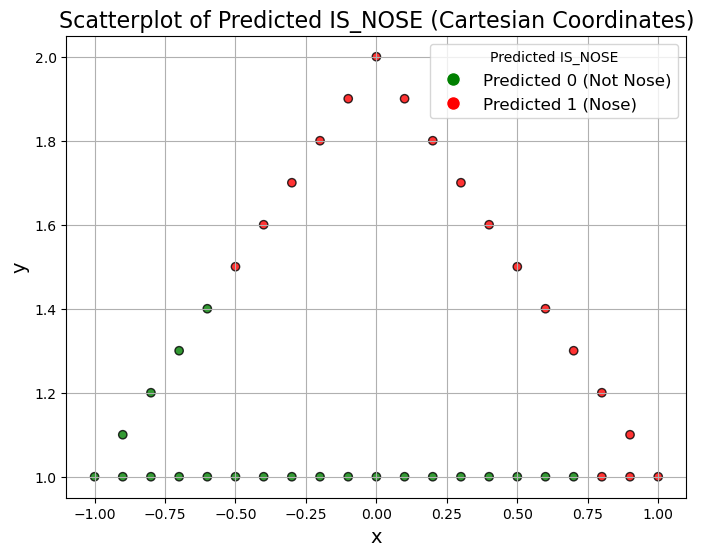

In [34]:
# ---------------- Question 3: Scatterplot ----------------
# Create scatterplot to visualize predictions
plt.figure(figsize=(8, 6))
colors = np.where(predictions == 1, 'red', 'green')  # Red for Nose (1), Green for Not Nose (0)
plt.scatter(df['x'], df['y'], c=colors, edgecolor='k', alpha=0.8)
plt.title('Scatterplot of Predicted IS_NOSE (Cartesian Coordinates)', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid(True)
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Predicted 0 (Not Nose)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Predicted 1 (Nose)')
], title='Predicted IS_NOSE', loc='upper right', fontsize=12)
plt.show()


In [24]:
# ---------------- Question 3: Polar Transformation and Logistic Regression ----------------
# Transform Cartesian coordinates to Polar coordinates
df['r'] = np.sqrt((df['x'] + 0.2)**2 + df['y']**2)  # Radius
df['theta'] = np.arctan2(df['y'], df['x'] + 0.2)    # Angle in radians

# Prepare data for logistic regression in polar coordinates
X_polar = sm.add_constant(df[['r', 'theta']])
y_polar = df['IS_NOSE']

# Train the logistic regression model
model_polar = sm.Logit(y_polar, X_polar).fit()
print(model

# Get the polar model equation
coef_polar = model_polar.params
model_equation_polar = (
    f"Logit(IS_NOSE) = {coef_polar['const']:.4f} + {coef_polar['r']:.4f}*r + {coef_polar['theta']:.4f}*theta"
)

# Predict with the polar model using threshold 0.5
predicted_probs_polar = model_polar.predict(X_polar)
predictions_polar = (predicted_probs_polar >= 0.5).astype(int)

# Calculate confusion matrix and accuracy for polar model
conf_matrix_polar = confusion_matrix(y_polar, predictions_polar)
accuracy_polar = accuracy_score(y_polar, predictions_polar)
f1_polar = f1_score(y_polar, predictions_polar)

print("\nQuestion 3 Results:")
print(f"Model Equation (Polar): {model_equation_polar}")
print(f"Confusion Matrix (Polar):\n{conf_matrix_polar}")
print(f"Accuracy Rate (Polar): {accuracy_polar:.2f}")
print(f"F1-Score (Polar): {f1_polar:.2f}")

Optimization terminated successfully.
         Current function value: 0.639390
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                IS_NOSE   No. Observations:                   40
Model:                          Logit   Df Residuals:                       37
Method:                           MLE   Df Model:                            2
Date:                Sat, 30 Nov 2024   Pseudo R-squ.:                 0.07755
Time:                        20:55:25   Log-Likelihood:                -25.576
converged:                       True   LL-Null:                       -27.726
Covariance Type:            nonrobust   LLR p-value:                    0.1165
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8925      2.193     -0.863      0.388      -6.191       2.406
r              1.9477      1.

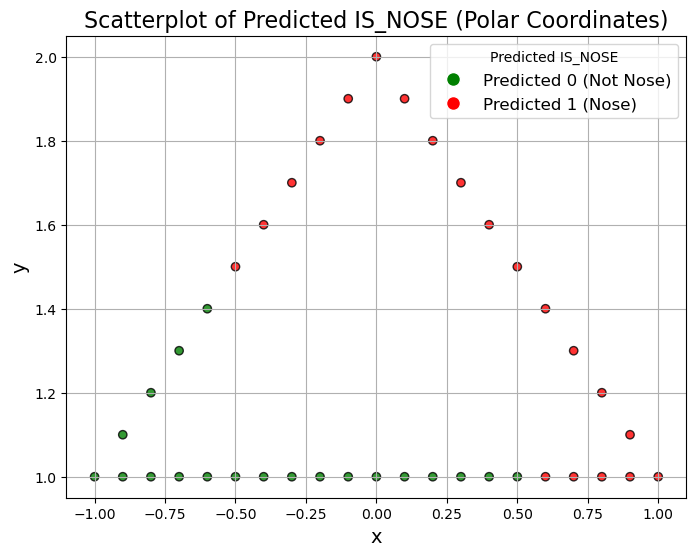

In [36]:
# ---------------- Question 2: Scatterplot ----------------
# Scatterplot for polar predictions
plt.figure(figsize=(8, 6))
colors_polar = np.where(predictions_polar == 1, 'red', 'green')  # Red for Nose (1), Green for Not Nose (0)
plt.scatter(df['x'], df['y'], c=colors_polar, edgecolor='k', alpha=0.8)
plt.title('Scatterplot of Predicted IS_NOSE (Polar Coordinates)', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid(True)
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Predicted 0 (Not Nose)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Predicted 1 (Nose)')
], title='Predicted IS_NOSE', loc='upper right', fontsize=12)
plt.show()